📂 Please upload your CSV file...


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025.csv
✅ File uploaded: nba_traditional_RS_2020_2025.csv


/tmp/ipython-input-2491006296.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by=ranking_metric, ascending=False).head(10))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ CSV saved and ready to download: top10_ironman_GP_2020_25.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🖼️ PNG chart saved and ready to download: top10_ironman_GP_2020_25.png


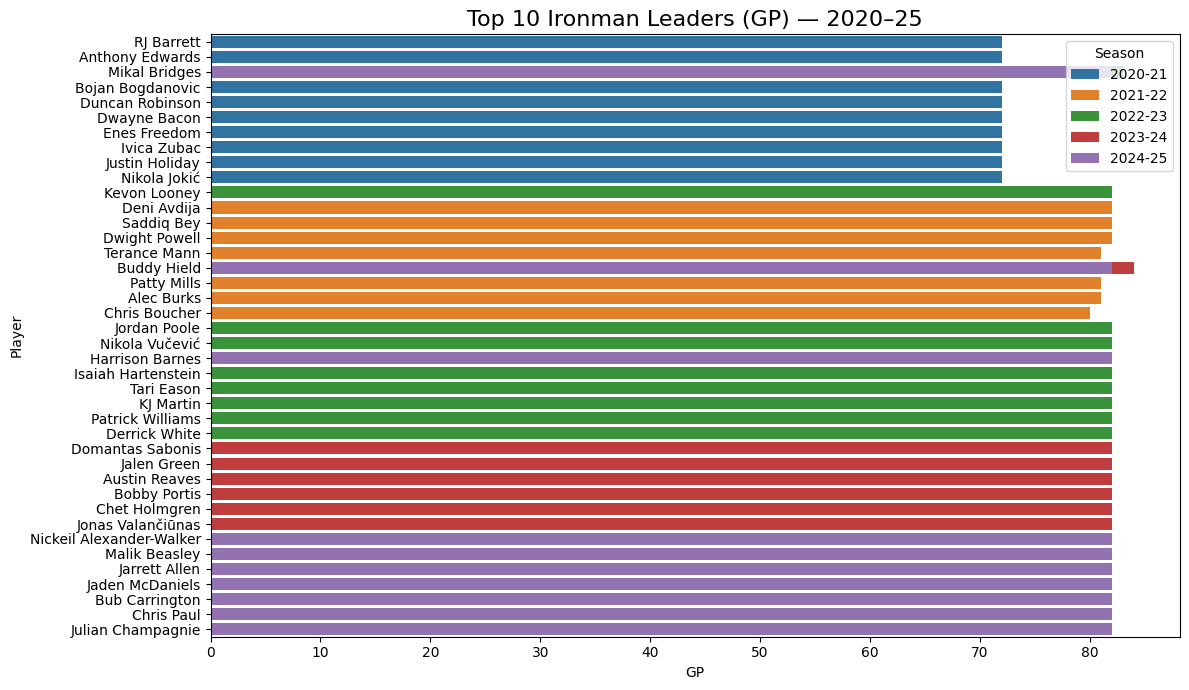

In [5]:
# 📊 Ironman Leaders (2020–25 Seasons) — Google Colab Version
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ===== 1. Upload Dataset =====
print("📂 Please upload your CSV file...")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"✅ File uploaded: {file_name}")

# ===== 2. Load Dataset =====
df = pd.read_csv(file_name)

# ===== 3. Clean & Prepare =====
# Fix season type formatting if needed
if "Season_Type" in df.columns:
    df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ', regex=False)

# Ensure numeric columns are properly formatted
df['GP'] = pd.to_numeric(df['GP'], errors='coerce')
df['MIN'] = pd.to_numeric(df['MIN'], errors='coerce')

# Drop rows without GP or MIN
df = df.dropna(subset=['GP', 'MIN'])

# ===== 4. Choose Ranking Metric =====
# Options: 'GP' for games played OR 'MIN' for total minutes played
ranking_metric = "GP"  # 🔹 Change to "MIN" if you want minutes leaders

# ===== 5. Get Top 10 Per Season =====
top10_per_season = (
    df.groupby(['Year', 'Season_Type'], group_keys=False)
      .apply(lambda x: x.sort_values(by=ranking_metric, ascending=False).head(10))
)

# ===== 6. Save Results =====
output_csv = f"top10_ironman_{ranking_metric}_2020_25.csv"
top10_per_season.to_csv(output_csv, index=False)
files.download(output_csv)
print(f"✅ CSV saved and ready to download: {output_csv}")

# ===== 7. Visualization =====
plt.figure(figsize=(12, 7))
sns.barplot(
    x=ranking_metric,
    y='PLAYER',
    hue='Year',
    data=top10_per_season,
    dodge=False
)
plt.title(f"Top 10 Ironman Leaders ({ranking_metric}) — 2020–25", fontsize=16)
plt.xlabel(ranking_metric)
plt.ylabel("Player")
plt.legend(title="Season")
plt.tight_layout()

# Save chart
output_img = f"top10_ironman_{ranking_metric}_2020_25.png"
plt.savefig(output_img, format='png', dpi=300)
files.download(output_img)
print(f"🖼️ PNG chart saved and ready to download: {output_img}")

plt.show()